In [2]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 99

# About the Dataset

**Soul Bike Data** 
This dataset is based on bike sharing in Korea developing its mobility movement in all areas of the country where it is possible to walk and all the people who can and should ride share bikes in the open because there are proposals that the companies themselves deliver to the people

Link to data: 
https://www.kaggle.com/datasets/willianoliveiragibin/bike-seoul-sharing?select=SeoulBikeData.csv

 # finding the encoding of the file

In [39]:
import chardet
with open('./Data/SeoulBikeData.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

#print the encoding    
print(result['encoding'])    

ISO-8859-1


# reading the data in

In [9]:
bike_df = pd.read_csv('./Data/SeoulBikeData.csv', sep=',', encoding = result['encoding'])

print(bike_df.shape)
bike_df.head()

(8760, 14)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Visual exploration 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 112.,  417.,  809., 1180., 1234., 1194., 1569., 1354.,  717.,
         174.]),
 array([-17.8 , -12.08,  -6.36,  -0.64,   5.08,  10.8 ,  16.52,  22.24,
         27.96,  33.68,  39.4 ]),
 <BarContainer object of 10 artists>)

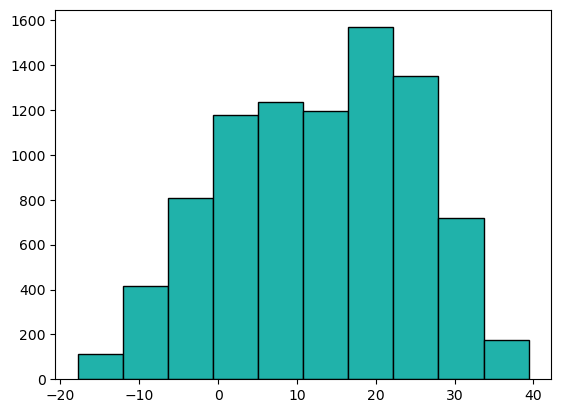

In [31]:
plt.hist(bike_df["Temperature(°C)"], color = "lightseagreen", ec="black")

# Create scatter plots for all columns against all other columns

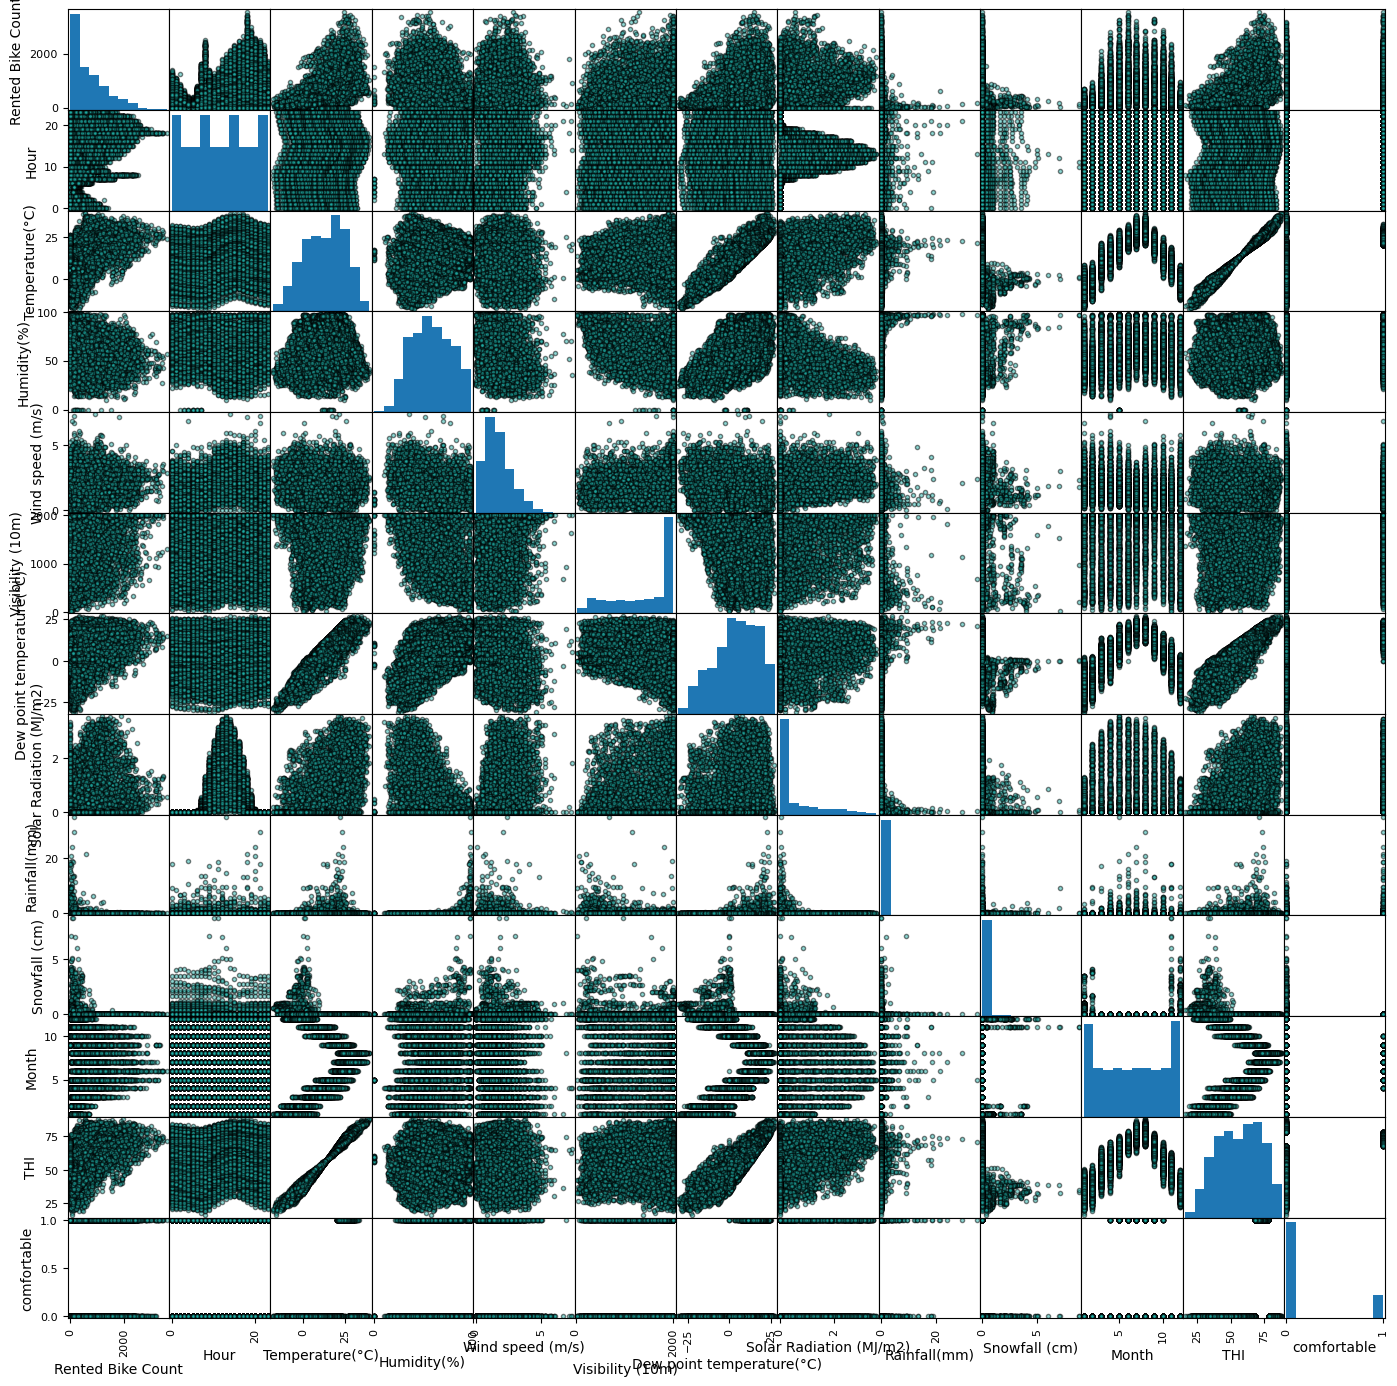

In [55]:
from pandas.plotting import scatter_matrix

scatter_matrix(bike_df, alpha=0.5, figsize=(17, 17), diagonal='hist', color = "lightseagreen", ec="black")
plt.show()

# Converting the data type

In [43]:
bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [45]:
# Convert the object field to a datetime field
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format="%d/%m/%Y")

# Extract the month and create a new column
bike_df['Month'] = bike_df['Date'].dt.month

In [49]:
#calculating temperature-humidity index THI = 0.8T + RH(T-14.4) + 46.4

bike_df['THI'] = (0.8 * bike_df['Temperature(°C)']) + ((bike_df['Humidity(%)']/100)*(bike_df['Temperature(°C)'] - 14.4)) + 46.4

<Axes: >

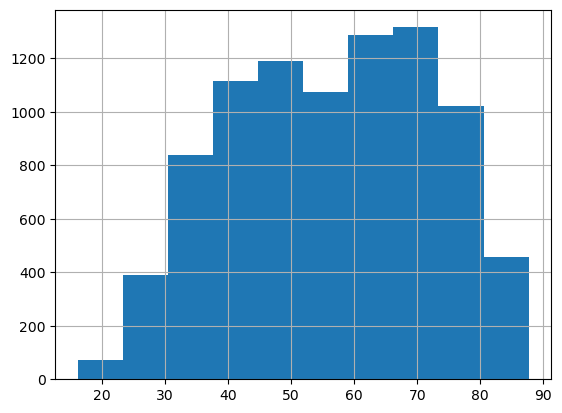

In [51]:
bike_df['THI'].hist()

In [53]:
def isComfortableToBike (THI):
    if THI <= 78 and THI >= 68:
        return 1
    elif THI > 78:
        return 0
    elif THI < 68:
        return 0
    
bike_df['comfortable'] = bike_df['THI'].apply(isComfortableToBike)   

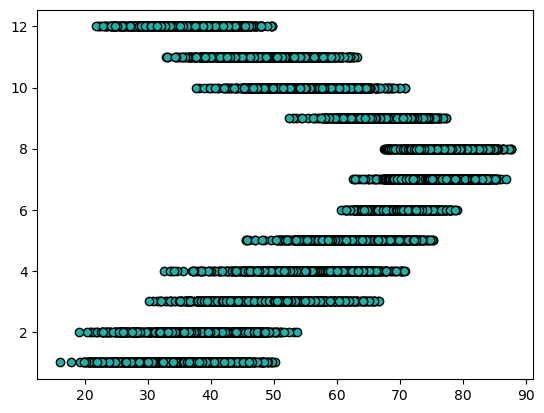

In [56]:
plt.scatter(bike_df['THI'], bike_df['Month'], color = "lightseagreen", ec="black")